In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Datasets
* **Data File:** Data/lake_huron.txt. The data is annual measurements of the level, in feet, of Lake Huron 1875–1972.).The data contains two columns: year and level (feet).
*  **Data File:** Data/cars_stopping_1920s.txt. The data give the speed of cars and the distances taken to stop in the 1920s.The data contains two columns: speed(mph)and stopping_distance(feet)
* **Data File:** Data/florida.txt. Vote by county in Florida for President in the 2000 election. One row for each county. The data contains two columns: G. W. Bush (votes) and A. Gore (votes).

### Ex1. Simple plot
* using no.loadtxt() to load each of hte previous data files and do the following tasks.
* Choose the right kind of plot (line, scatter, bar, histogram). There may be more than one right choice. plot the data correctly.
* make sure all the details are sensible (axes, labelling, etc.)
* write a short caption for the data in the cell provided.

In [5]:
## load data file
huron = np.loadtxt('../Data/lake_huron.txt')

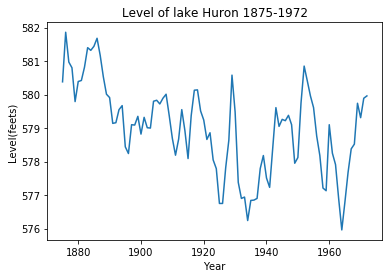

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(huron[:,0],huron[:,1])
ax.set_title("Level of lake Huron 1875-1972")
ax.set_xlabel("Year")
ax.set_ylabel("Level(feets)")

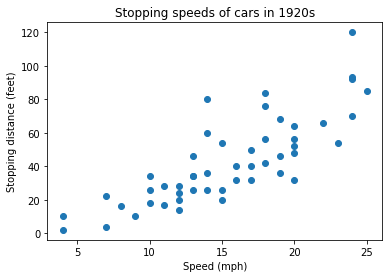

In [8]:
### Ex2. cars voting
## load data file
cars = np.loadtxt('../Data/cars.txt')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(cars[:,0], cars[:,1])
ax.set_title("Stopping speeds of cars in 1920s")
ax.set_xlabel("Speed (mph)")
ax.set_ylabel("Stopping distance (feet)")

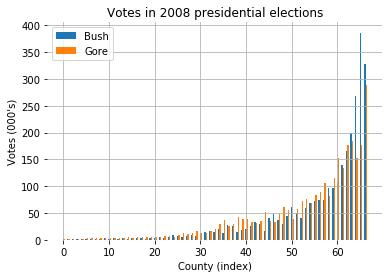

In [14]:
### Ex3. florida voting
votes = np.loadtxt('../Data/florida.txt')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#sort data by couty size for easier viewing
vote_order = np.argsort(np.sum(votes, axis=1))
votes = votes[vote_order]

ax.bar(np.arange(votes.shape[0]), votes[:,0]/1000, label="Bush", width=0.3)
ax.bar(np.arange(votes.shape[0])+0.3, votes[:,1]/1000, label='Gore', width=0.3)

ax.set_title("Votes in 2008 presidential elections")
ax.set_xlabel('County (index)')
ax.set_ylabel("Votes (000's)")
ax.set_frame_on(False)
ax.grid(True)
ax.legend()


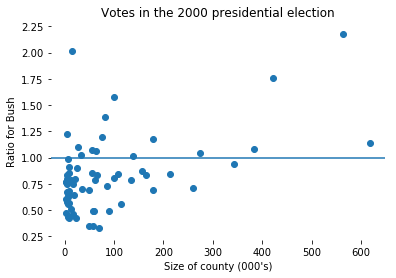

In [10]:
# this is an alternative solution that would still be valid
# we haven't said how to interpret the data
# plot ratio of votes for Bush against the size of each county
fig = plt.figure()
total = votes[:,0] + votes[:,1]
ax = fig.add_subplot(1,1,1)
ax.scatter(total/1000.0, votes[:,0]/votes[:,1])

ax.set_title("Votes in the 2000 presidential election")
ax.set_xlabel("Size of county (000's)")
ax.set_ylabel("Ratio for Bush")
ax.set_frame_on(False)
ax.axhline(1.0)

### Ex.2

* **Data file:**  Data/puromycin.txt
* **Description:** Reaction velocity versus substrate concentration in an enzymatic reaction involving untreated cells or cells treated with Puromycin.
* **Split:** split the data according to the treated condition to make up the facets/layers.
* **Columns:** concentration (parts per million), rate (counts/min^2) and treated (0 or 1)

 ** Use this dataset to plot the treated and untreated data**

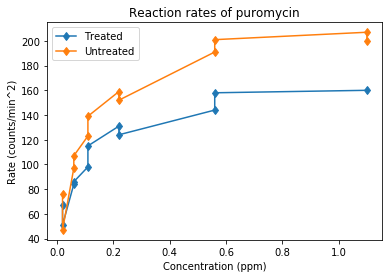

In [16]:
puromycin = np.loadtxt('../Data/puromycin.txt')

# split into two sections
untreated = puromycin[puromycin[:,2] == 0, :]
treated = puromycin[puromycin[:,2] == 1, :]

# Figure 1: layered
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(treated[:,0], treated[:,1], label='Treated', marker='d', linestyle='-')
plt.plot(untreated[:,0], untreated[:,1], label='Untreated', marker='d', linestyle='-')
ax.legend()
ax.set_title("Reaction rates of puromycin")
ax.set_xlabel("Concentration (ppm)")
ax.set_ylabel("Rate (counts/min^2)")

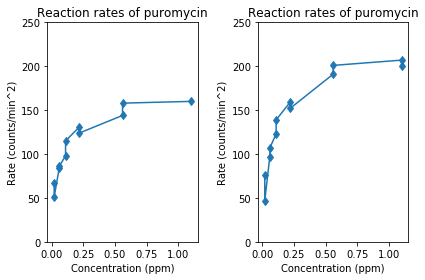

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.plot(treated[:,0], treated[:,1], label='Treated', marker='d', linestyle='-')
ax.set_title("Reaction rates of puromycin")
ax.set_xlabel("Concentration (ppm)")
ax.set_ylabel("Rate (counts/min^2)")
ax.set_ylim(0,250) # must set ylimit to get scaling correct

ax = fig.add_subplot(1,2,2)
plt.plot(untreated[:,0], untreated[:,1], label='Untreated', marker='d', linestyle='-')
ax.set_title("Reaction rates of puromycin")
ax.set_xlabel("Concentration (ppm)")
ax.set_ylabel("Rate (counts/min^2)")
ax.set_ylim(0,250)
plt.tight_layout()

### Ex3
* **Data file:**  Data/diamonds.tx
* **Description:** Sale price of diamonds according to multiple factors, including clarity, size, cut quality and colour.
* **Columns:**  weight(carat), cut(0-4), colour(0-6), clarity(0-7), cut_angle(deg) and sale_price

**Using that dataset, do the folowing:**
* Plot the price per carat, grouping by colour, using each of the three plotting methods described below. Think about how to split the data into groups. (hint: it is fine to use a for loop...)
* Plot the data, on three separate figures, using:
  * A simple bar chart of the means.
  * A barchart showing the means, and half a standard deviation above and below the mean. Find a way to show this interval (hint: look at the plt.bar documentation). The standard deviation of an array can be computed by np.std(x, axis), just like np.mean().
  * A Box plot of the values.
* Mark the ticks on the x axis using the real colour categories for diamonds. The mapping from the number to the colour letter used in diamond grading is

  0=D, 1=E, 2=F, 3=G, 4=H, 5=I, 6=J.


In [21]:
diamonds = np.loadtxt('../Data/diamonds.txt')

In [22]:
# load and group the data
# split into groups; use a for loop to iterate over possible values
groups = []
for i in range(7):
    mask = diamonds[:,2]==i
    groups.append(diamonds[mask,5] / diamonds[mask,0])

# compute means and standard deviations (could also have done this in the loop)
means = [np.mean(group) for group in groups]
stds = [np.std(group) for group in groups]


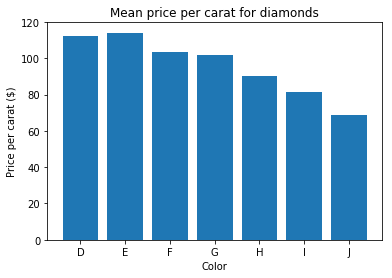

In [23]:
# plot the means
# Figure 1: just the means
fig = plt.figure()
ax = fig.add_subplot(1,1,1)    
plt.bar(np.arange(7), means)
ax.set_title("Mean price per carat for diamonds")
ax.set_xlabel("Color")
ax.set_ylabel("Price per carat ($)")
ax.set_xticks(np.arange(7))
ax.set_xticklabels('DEFGHIJ')

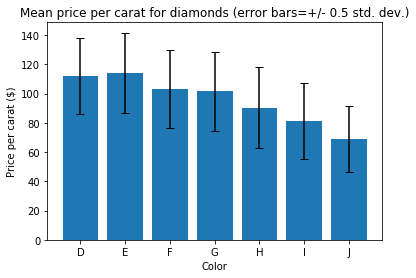

In [24]:
# plot the means with std. devs.
# Figure 2: mean +/- std_dev
fig = plt.figure()
ax = fig.add_subplot(1,1,1)    
plt.bar(np.arange(7), means, yerr=0.5*np.array(stds), capsize=4)
ax.set_title("Mean price per carat for diamonds (error bars=+/- 0.5 std. dev.)")
ax.set_xlabel("Color")
ax.set_ylabel("Price per carat ($)")
ax.set_xticks(np.arange(7))
ax.set_xticklabels('DEFGHIJ')

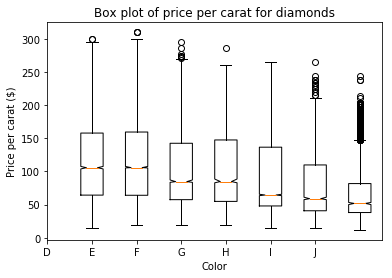

In [26]:
# a Box plot
# Figure 3: Box plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)    
# notch and bootstrap are optional -- they just make things look nicer
plt.boxplot(groups, notch=True, bootstrap=1000) 
ax.set_title("Box plot of price per carat for diamonds")
ax.set_xlabel("Color")
ax.set_ylabel("Price per carat ($)")
ax.set_xticks(np.arange(7))
ax.set_xticklabels('DEFGHIJ')